## Normal Distributions Arising From Sum of Fluctuations

This is simply a recap of an experiment from Chapter 4.1. The experiment consisted in a 1000 people at a center line each tossing a fair coin and stepping left on a head and stepping right on tails. After 16 coin tosses, the final positions were recorded. The distribution of positions resembles a normal distribution centerted at $0$. 

The explanation based on entropy is that there are far more ways this sum of deviations can be $0$ and hence $0$ has the highest frequency. There are fewer ways this sum could be $1$ or $-1$. And so on.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

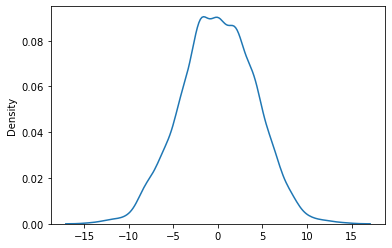

In [2]:
size = 16
num_persons = 1000

deviations = np.random.choice([-1, 1], size=(num_persons, size))
final_pos = np.sum(deviations, axis=1)

sns.kdeplot(final_pos);

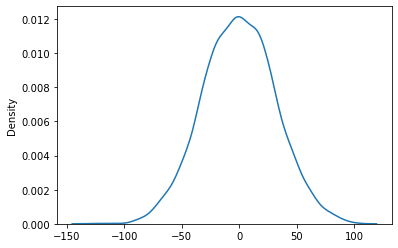

In [3]:
size = 1000
num_persons = 5000

deviations = np.random.choice([-1, 1], size=(num_persons, size))
final_pos = np.sum(deviations, axis=1)

sns.kdeplot(final_pos);

## Entropy

In [4]:
def h(p):
    return sum([- p_i * np.log(p_i) if p_i > 0 else 0.0 for p_i in p ])

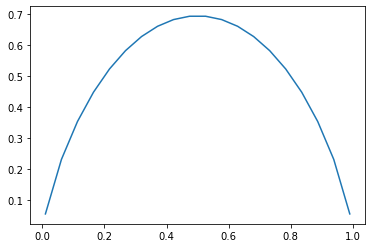

In [5]:
p1_vals = np.linspace(0.01, 0.99, 20)
entropy = [h([p, 1-p]) for p in p1_vals]

plt.plot(p1_vals, entropy)
plt.show();

In [6]:
h([0.5, 0.5])

0.6931471805599453

## Pebbles in Buckets

Let's suppose that we have $10$ numbered pebbles and $5$ numbered buckets. We can arrange the pebbles in buckets in a total of $5^{10}$ ways. If we have $n_i$ pebbles in bucket~$i$, so that $\sum_{i = 1}^{5} n_i = 10 := N$, then the number of ways of achieving this is:
$$
    {N \choose n_1} \cdot {N - n_1 \choose n_2} \cdot {N - n_1 - n_2 \choose n_3} \cdots {N - \sum_{i = 1}^4 n_i \choose n_5}.
$$
This simplifies to:
$$
    \frac{N!}{n_1! n_2! n_3! n_4! n_5!}.
$$

In [7]:
import math

from typing import List


def num_arrangements(num_pebbles: int, pebbles_in_buckets: List[int]):
    numer = math.factorial(num_pebbles)
    res = numer
    
    for k in pebbles_in_buckets:
        res = int(res / math.factorial(k))
        
    return res

In [8]:
num_arrangements(10, [0, 0, 10, 0, 0])

1

In [9]:
num_arrangements(10, [0, 1, 8, 1, 0])

90

In [10]:
num_arrangements(10, [0, 2, 6, 2, 0])

1260

In [11]:
num_arrangements(10, [1, 2, 4, 2, 1])

37800

In [12]:
num_arrangements(10, [2, 2, 2, 2, 2])

113400

### Code 10.1

In [13]:
p_A = [0, 0, 10, 0, 0]
p_B = [0, 1, 8, 1, 0]
p_C = [0, 2, 6, 2, 0]
p_D = [1, 2, 4, 2, 1]
p_E = [2, 2, 2, 2, 2]

p_list = [p_A, p_B, p_C, p_D, p_E]

### Code 10.2

In [14]:
p_norm = list(map(lambda item: np.array(item) / sum(item), p_list))

### Code 10.3

In [15]:
H = [h(p) for p in p_norm]
H

[0.0,
 0.639031859650177,
 0.9502705392332347,
 1.4708084763221112,
 1.6094379124341005]

### Code 10.4

In [16]:
ways = [num_arrangements(10, p) for p in p_list]
logways_pp = np.log(ways) / 10

## Log-ways per pebble

This works out to be 
$$
    \frac{1}{N} \cdot \log \frac{N!}{n_1! n_2! n_3! n_4! n_5!}
$$
Using Stirling's approximation, $n! \approx (n / e)^n$, we obtain that:
\begin{align*}
    \frac{1}{N} \cdot \log \frac{N!}{n_1! n_2! n_3! n_4! n_5!} 
            & = \frac{1}{N} \left ( N \log N - \sum_{i} n_i \log n_i \right ) \\
            & = \frac{1}{N} \left ( \sum_{i} n_i \log N - \sum_{i} n_i \log n_i \right ) \\
            & = \frac{1}{N} \sum_{i} n_i \log \frac{N}{n_i} \\
            & = - \sum_{i} p_i \log p_i
\end{align*}

Thus the log-ways per pebble is a good approximation of the entropy of the distribution at hand. This approximation gets better as $N \to \infty$. Thus one can interpret the entropy of a probability distribution as the _average of the logarithm of the number of ways that distribution can "happen"_.

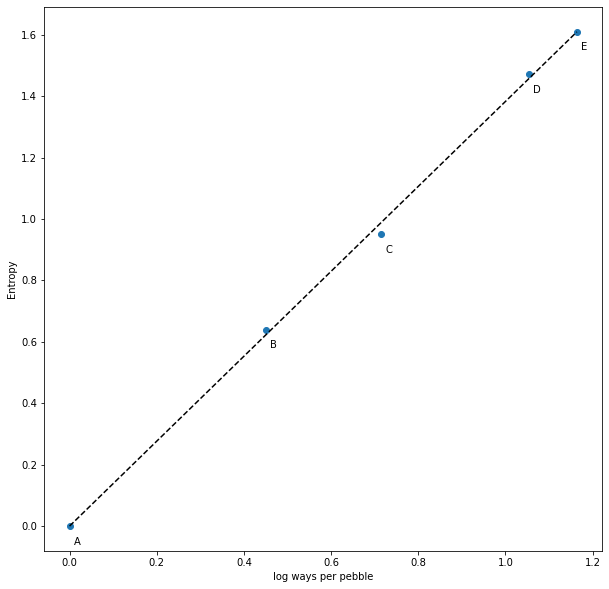

In [17]:
labels = ['A', 'B', 'C', 'D', 'E']

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.scatter(logways_pp, H);
ax.plot([0.0, max(logways_pp)], [0.0, max(H)], "--k");

for i, txt in enumerate(labels):
    ax.annotate(txt, (logways_pp[i] + 0.01, H[i] - 0.06))
    
ax.set_xlabel('log ways per pebble');
ax.set_ylabel('Entropy');

## Generalized Normal and Maximum Entropy

The pdf of the generalized normal distribution is given by
$$
    \text{Pr}(y \mid \mu, \alpha, \beta) 
        = \frac{\beta}{2 \alpha \Gamma(1 / \beta)} 
            \text{exp} \left ( - \left (\frac{|y - \mu|}{\alpha} \right )^{\beta} \right ).
$$
The variance $\sigma^2$ of this distribution is given by (see: https://bookdown.org/content/4857/big-entropy-and-the-generalized-linear-model.html#maximum-entropy)
$$
    \sigma^2 = \frac{\alpha^2 \Gamma(3 / \beta)}{\Gamma(1/\beta)}.
$$

We can then express $\alpha$ in terms of $\sigma^2$ and $\beta$ as:
$$
    \alpha = \sqrt{\sigma^2 \cdot \frac{\Gamma(1 / \beta)}{\Gamma(3 / \beta)}}.
$$

In [18]:
from scipy.special import gamma
from scipy.stats import gennorm, entropy


def gen_norm(y, m, a, b):
    return (b / (2 * a * gamma(1 / b)) )  * np.exp(- ( np.abs(y - m) / a )**b )

def alpha_from_beta(sigma_sq, beta):
    return np.sqrt(sigma_sq * gamma(1 / beta) / gamma(3 / beta))

In [19]:
N_PTS = 1000
N_SHAPES = 4

x_vals = np.linspace(-5, 5, N_PTS)
b_vals = np.round(np.linspace(1, 4, N_SHAPES), 2)

pdf_vals = np.zeros(shape=(N_SHAPES, N_PTS))

m = 0
for i, b in enumerate(b_vals):
    a = alpha_from_beta(1, b)
    pdf_vals[i] = gen_norm(x_vals, m, a, b)

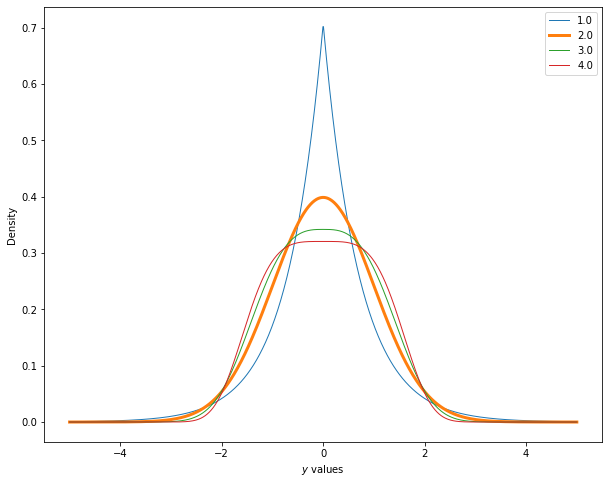

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

for i, b in enumerate(b_vals):
    if b == 2:
        lw = 3
    else:
        lw = 1
    ax.plot(x_vals, pdf_vals[i], label=b, linewidth=lw)

ax.set_xlabel(r'$y$ values')
ax.set_ylabel('Density')
plt.legend();

### Entropy Plots

A small note for entropy calculations for continuous random variables. If $X$ is a continuous random variable with probability density function $f$, then the entropy of the distribution of $X$ is defined as the integral 
$$
    - \int_{S} f(x) \log f(x) dx,
$$
where $S = \{x \mid f(x) > 0 \}$, provided this integral exists. We can approximate this by discretizing the function $f$, say, by dividing an interval $[x_{a}, x_{b}] \subset S$ into contiguous subintervals of size $\Delta$, and using the discrete version of the entropy function: 
\begin{align*}
    - \sum_i p_i \log p_i & = - \sum_i f(x_i) \Delta \log (f(x_i) \Delta) \\ 
                          & = - \sum_i f(x_i) \Delta \log f(x_i) - \sum_i f(x_i) \Delta \log \Delta \\
                          & = - \Delta \left ( \sum_i f(x_i) \log f(x_i) \right ) - 1 \cdot \log \Delta
\end{align*}

See Cover and Thomas, _Elements of Information Theory_, Chapter 8, Differential Entropy. We use this formulation below to create the right-hand panel of Figure 10.2

In [21]:
START = -5
END = 5.001
N_SHAPES = 40
DELTA = 0.0001

x_vals = np.arange(START, END, DELTA)
entropies = np.zeros(shape=(N_SHAPES))
b_vals = np.linspace(1, 4, N_SHAPES)

m = 0
# we are going to approximate an integral with a set of finite sums. We are computing 
# - sum_i p_i log p_i = - sum_{i} f(x_i) * delta * log (f(x_i) * delta), where f(x) is the density. 
# See Cover and Thomas, Elements of Information Theory, Chapter 8, Differential Entropy.

for i, b in enumerate(b_vals):
    a = alpha_from_beta(1, b)
    entropies[i] = DELTA * h(gen_norm(x_vals, m, a, b)) - np.log(DELTA)

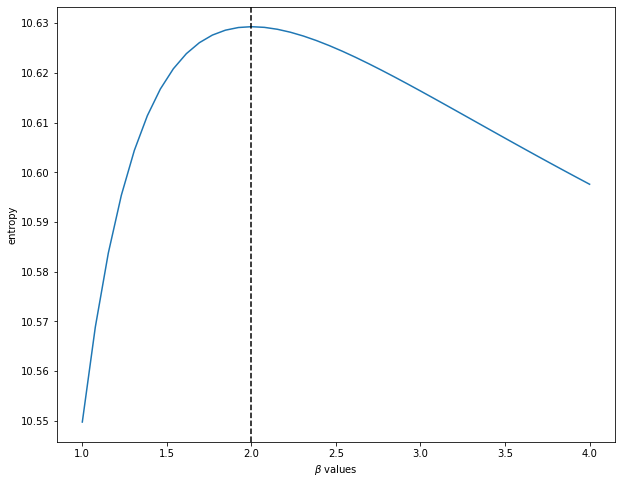

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))


ax.plot(b_vals, entropies);
ax.axvline(x=2.0, linestyle='--', color='k')
ax.set_xlabel(r'$\beta$ values');
ax.set_ylabel('entropy');

### Comment on the Entropy Values

As can be seen, the entropy values do not agree with those in the textbook. However the general shape of the graph is indeed the same as in Figure 10.2.